In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [2]:
df=pd.read_csv('dados.csv')

In [3]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [7]:
print(sorted(df['Anos de Estudo'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


## Distribuição de Frequência para variáveis qualitativas

In [17]:
freq=df['Sexo'].value_counts()
percentual=100*df['Sexo'].value_counts(normalize=True)

In [24]:
dist_freq_qualitativa =pd.DataFrame({'Frequency':freq,'Percentage(%)':percentual})
dist_freq_qualitativa.rename(index={0:'M',1:'F'},inplace=True)
dist_freq_qualitativa.rename_axis('Sexo',axis='columns',inplace=True)

In [25]:
dist_freq_qualitativa

Sexo,Frequency,Percentage(%)
M,53250,69.299844
F,23590,30.700156


In [48]:
Sexo={0:'M',1:'F'}
Cor = {9:'Sem Declaração',
       8:'Parda',
       6:'Amarela',
       4:'Preta',
       2:'Branca',
       0:'Indígena'}

frequencia = pd.crosstab(df['Sexo'],df['Cor'])
frequencia.rename(index=Sexo,inplace=True)
frequencia.rename(columns=Cor,inplace=True)

percent = pd.crosstab(df['Sexo'],df['Cor'], normalize=True)*100
percent.rename(index=Sexo,inplace=True)
percent.rename(columns=Cor,inplace=True)


mean_budget = pd.crosstab(df['Sexo'],df['Cor'],aggfunc='mean',values = df['Renda'])
mean_budget.rename(index=Sexo,inplace=True)
mean_budget.rename(columns=Cor,inplace=True)


print(frequencia,'\n\n\n', percent,'\n\n\n',mean_budget)


Cor   Indígena  Branca  Preta  Amarela  Parda
Sexo                                         
M          256   22194   5502      235  25063
F          101    9621   2889      117  10862 


 Cor   Indígena     Branca     Preta   Amarela      Parda
Sexo                                                    
M     0.333160  28.883394  7.160333  0.305830  32.617126
F     0.131442  12.520822  3.759761  0.152264  14.135867 


 Cor      Indígena       Branca        Preta      Amarela        Parda
Sexo                                                                 
M     1081.710938  2925.744435  1603.861687  4758.251064  1659.577425
F     2464.386139  2109.866750  1134.596400  3027.341880  1176.758516


In [53]:
print('min income:',df['Renda'].min(),'max income:',df['Renda'].max())

min income: 0 max income: 200000


In [54]:
class_income =[0,1576,3152,7880,15760,200000]
label = ['E','D','C','B','A']

In [62]:
income_freq=pd.value_counts(pd.cut(x=df['Renda'],bins=class_income,labels=label, include_lowest=True))
income_freq

income_percent=pd.value_counts(pd.cut(x=df['Renda'],bins=class_income,labels=label, include_lowest=True),normalize=True)*100
income_percent

income_df=pd.DataFrame({'Freq':income_freq,'Percent':income_percent}).sort_index(ascending=False)
income_df

,Freq,Percent
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


## Regra de Sturges

In [67]:
n=df.shape[0]
n

76840

In [77]:
k=1+(10/3)*np.log10(n)
k=int(np.floor(k))
k

17

In [78]:
pd.value_counts(
    pd.cut(
        x=df['Renda'],
        bins = k,
        include_lowest = True
    )
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(117647.059, 129411.765]        1
(82352.941, 94117.647]          1
(105882.353, 117647.059]        0
(176470.588, 188235.294]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
Name: Renda, dtype: int64

## Histogram


<AxesSubplot:title={'center':'Frequency Distribution '}, xlabel='High[m]', ylabel='Density'>

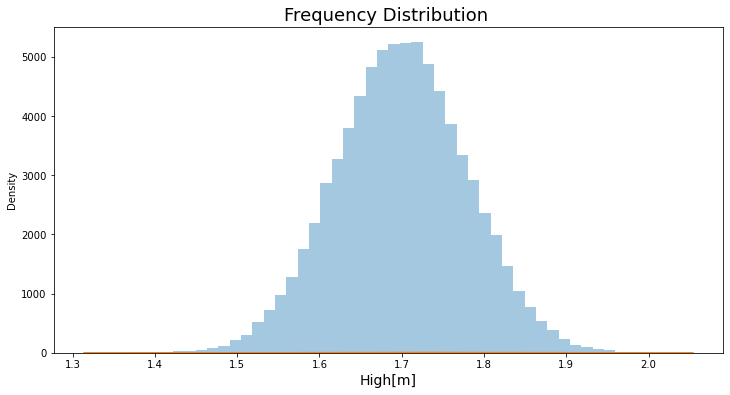

In [85]:
ax = sns.distplot(df['Altura'],kde=False)
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Distribution ', fontsize = 18)
ax.set_xlabel('High[m]', fontsize=14)
ax

C:\Users\55519\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'High[m]')

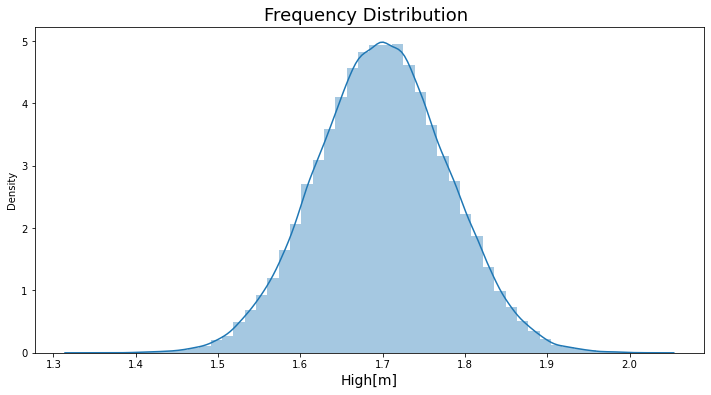

In [102]:
ax = sns.distplot(df['Altura'],kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Frequency Distribution ', fontsize = 18)
ax.set_xlabel('High[m]', fontsize=14)


<AxesSubplot:>

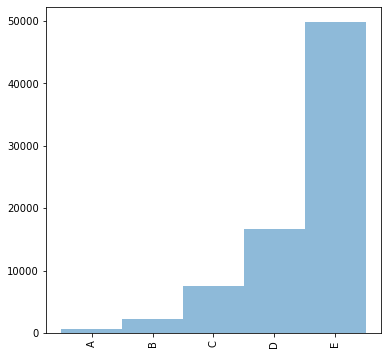

In [105]:
income_df['Freq'].plot.bar(width=1,figsize=(6,6),alpha=0.5)

# Medidas de Tendências Centrais

### Mean

In [109]:
df.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

### Median

In [111]:
df.groupby(['Sexo'])['Renda'].median()

Sexo
0    1350
1     900
Name: Renda, dtype: int64

### Mode

In [118]:
df['Renda'].mode()

0    788
dtype: int64

## Relationship between metrics

C:\Users\55519\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


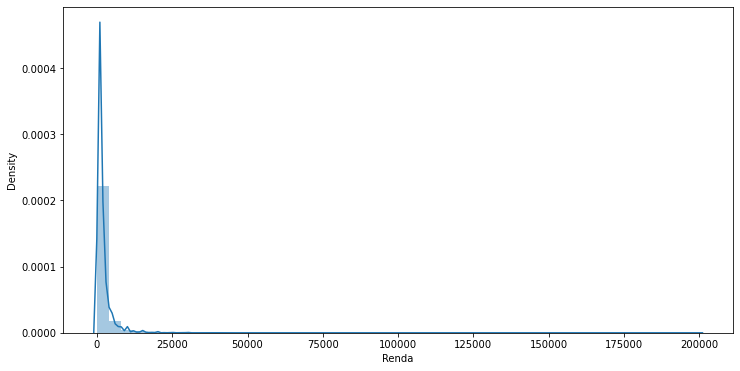

In [123]:
ax=sns.distplot(df.Renda)
ax.figure.set_size_inches(12,6)

C:\Users\55519\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


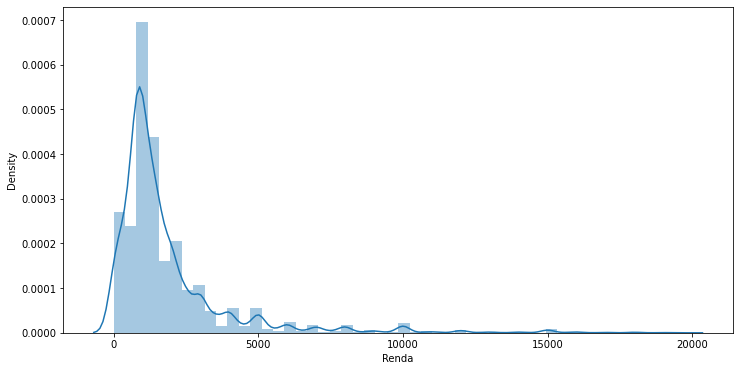

In [130]:
ax=sns.distplot(df.query('Renda<20000').Renda)
ax.figure.set_size_inches(12,6)


C:\Users\55519\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


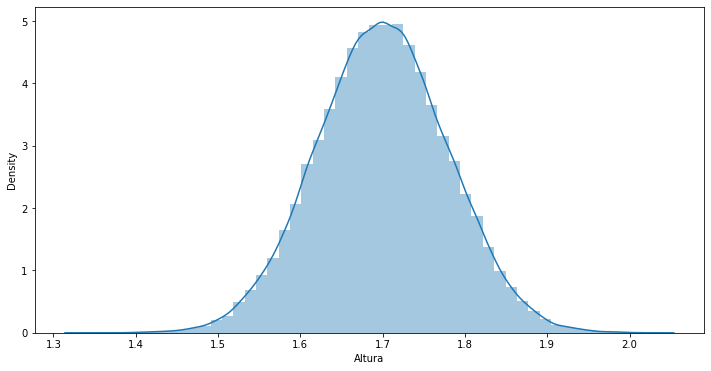

In [131]:
ax=sns.distplot(df.Altura)
ax.figure.set_size_inches(12,6)

C:\Users\55519\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


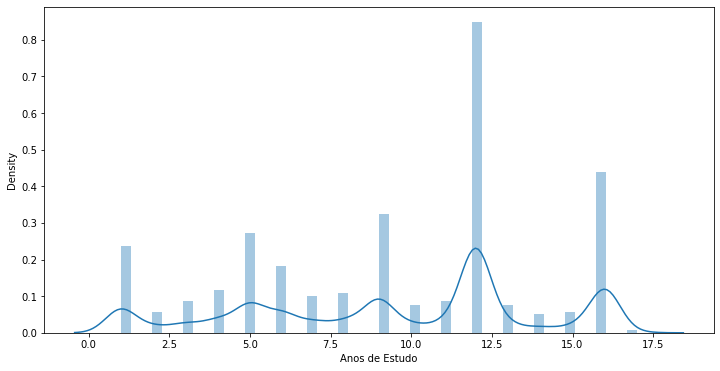

In [133]:
ax=sns.distplot(df['Anos de Estudo'])
ax.figure.set_size_inches(12,6)

## Medidas Separatrizes

### Quartis, decis, percentis

In [137]:
df.Renda.quantile([0.25,0.5,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [139]:
[i/10 for i in range(1,10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [140]:
df.Renda.quantile([i/10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [141]:
df.Renda.quantile([i/100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

C:\Users\55519\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


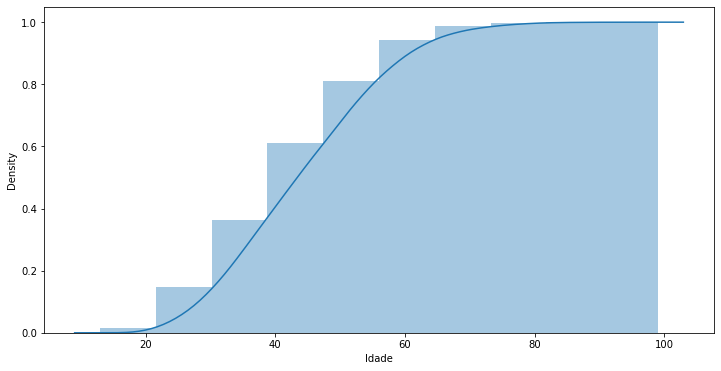

In [146]:
ax = sns.distplot(df.Idade, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True}, bins=10)
ax.figure.set_size_inches(12,6)


## Boxplot

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros'>

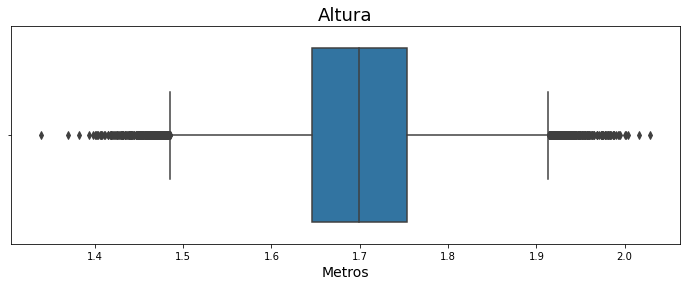

In [148]:
ax = sns.boxplot( x = 'Altura', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:title={'center':'Altura'}, xlabel='Metros', ylabel='Sexo'>

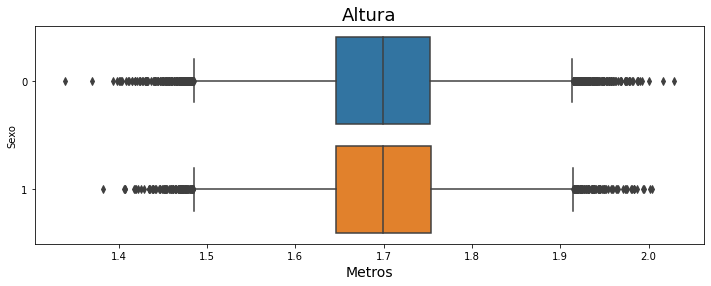

In [150]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

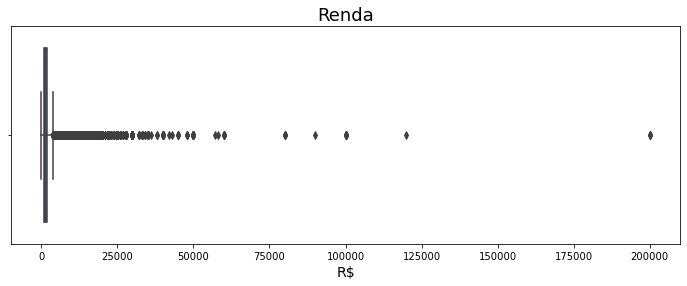

In [152]:
ax = sns.boxplot( x = 'Renda', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$'>

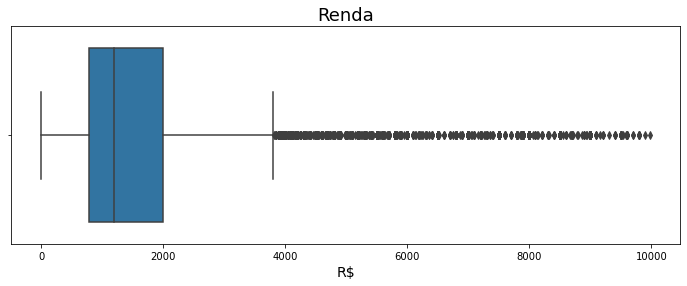

In [154]:
ax = sns.boxplot( x = 'Renda', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Sexo'>

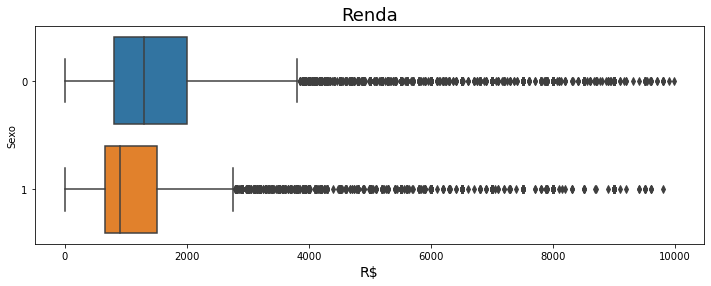

In [155]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

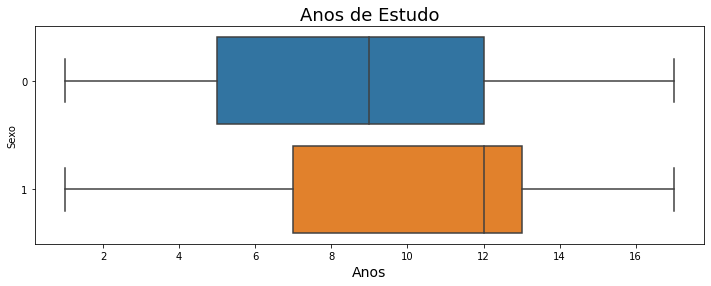

In [156]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

## Medidas de Dispersão

In [174]:
df.groupby(['Sexo'])['Renda'].mad()

Sexo
0    1647.588129
1    1212.146168
Name: Renda, dtype: float64

In [175]:
df.groupby(['Sexo'])['Renda'].var()

Sexo
0    1.289035e+07
1    6.608310e+06
Name: Renda, dtype: float64

In [176]:
df.groupby(['Sexo'])['Renda'].std()

Sexo
0    3590.312915
1    2570.663414
Name: Renda, dtype: float64